In [1]:
import pandas as pd

tokens_df = pd.read_csv("results/tokens.tsv", names=["study", "notation", "slug", "token"], delimiter="\t")

df = tokens_df.query("study == 'movies'").groupby(["token", "notation"])["slug"].nunique().reset_index()

In [2]:
import plotly.express as px

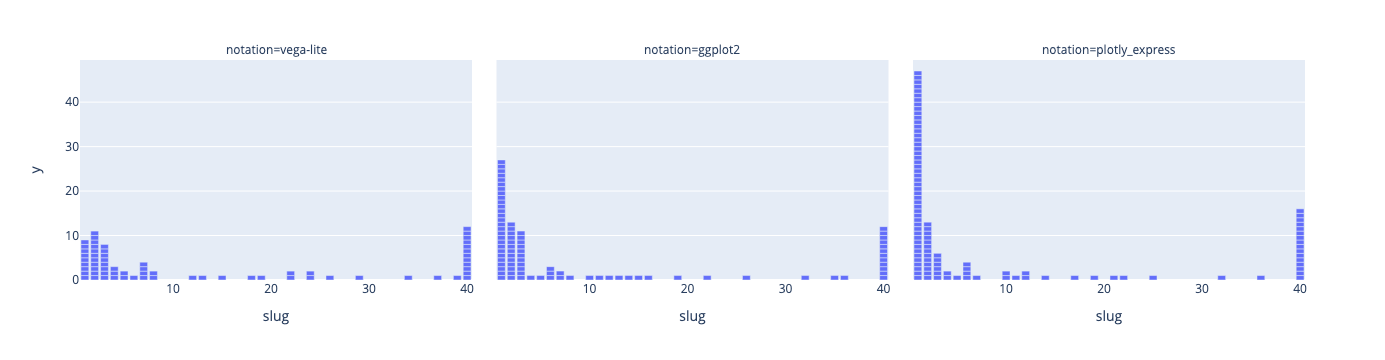

In [25]:
px.bar(df, x="slug", y=px.Constant(1), facet_col="notation", hover_name="token")#.add_shape(type="line", x0=0,y0=0, x1=30, y1=30, row="all", col="all")


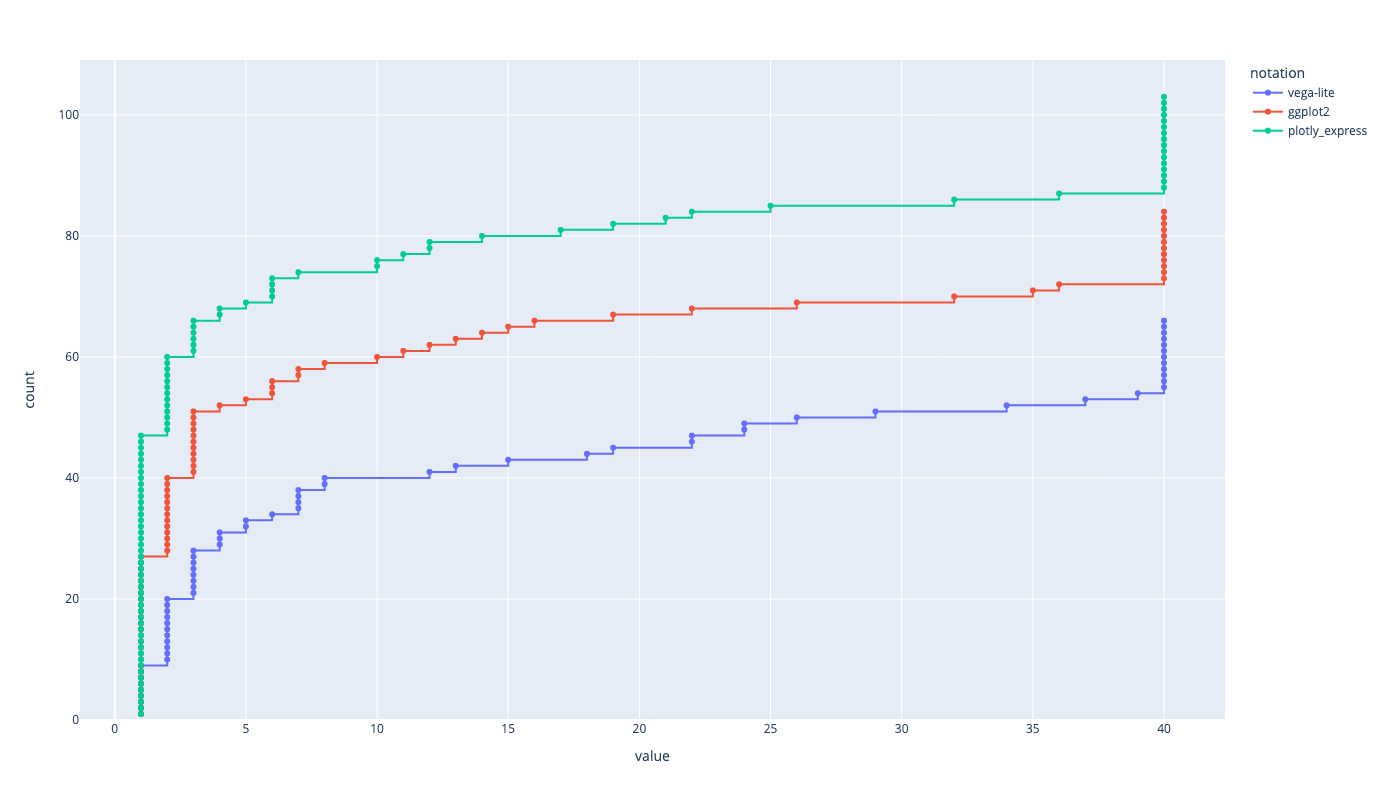

In [31]:
px.ecdf(df, color="notation", hover_name="token", ecdfnorm=None, height=800, markers=True)

In [50]:
import math

In [73]:
for notation, subdf in df.groupby("notation"):
    entropy = 0
    for _, r in subdf.iterrows():
        frac = r.slug/subdf.slug.max()
        entropy -= frac * math.log2(frac)
    print(notation, round(entropy, 2))

ggplot2 15.89
plotly_express 16.63
vega-lite 15.85
